### Breast Cancer Detection Using Python & Machine Learning

In [31]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_train.csv to breast_cancer_train.csv


In [51]:
df = pd.read_csv('breast_cancer_train.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,B,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.011670,0.005558,0.01251,0.001356,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,M,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.5910,25.200,0.008081,0.05122,0.055510,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.620,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,0.3892,1.0460,2.6440,32.740,0.007976,0.01295,0.016080,0.009046,0.02005,0.002830,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,B,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,0.5381,1.2000,4.2770,30.180,0.010930,0.02899,0.032140,0.015060,0.02837,0.004174,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


In [52]:
df.shape

(284, 32)

In [53]:
# Drop the columns with all missing values

df = df.dropna(axis=1)
df.shape # Original df is clean 

(284, 32)

In [54]:
# Get a count of malignant / bening type

df.diagnosis.value_counts()

B    172
M    112
Name: diagnosis, dtype: int64

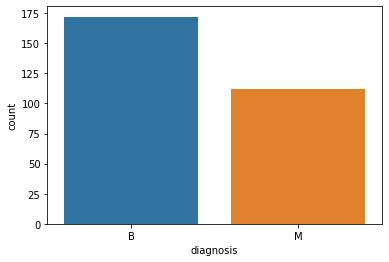

In [55]:
# Visualize the counts

sns.countplot(df['diagnosis'], label='Count')

In [56]:
# Check which columns to be encoded

df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [57]:
# Encode the categorical data values
print(df.iloc[:, 1].values)

['B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B'
 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M'
 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:, 1].values) # diagnosis column benign:0, malignant:1}

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [62]:
df.iloc[:, 1] = labelencoder_Y.fit_transform(df.iloc[:, 1].values) 
print(df.iloc[:, 1])
print(df.dtypes)

0      0
1      1
2      0
3      0
4      0
      ..
279    1
280    0
281    0
282    1
283    1
Name: diagnosis, Length: 284, dtype: int64
id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst   

In [63]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,863270,0,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,0.1199,0.8944,0.8484,9.227,0.003457,0.01047,0.011670,0.005558,0.01251,0.001356,13.290,27.49,85.56,544.1,0.1184,0.19630,0.19370,0.08442,0.2983,0.07185
1,87556202,1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.5910,25.200,0.008081,0.05122,0.055510,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701
2,858970,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.620,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
3,909220,0,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,0.3892,1.0460,2.6440,32.740,0.007976,0.01295,0.016080,0.009046,0.02005,0.002830,15.660,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234
4,9010333,0,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,0.5381,1.2000,4.2770,30.180,0.010930,0.02899,0.032140,0.015060,0.02837,0.004174,9.981,17.70,65.27,302.0,0.1015,0.12480,0.09441,0.04762,0.2434,0.07431


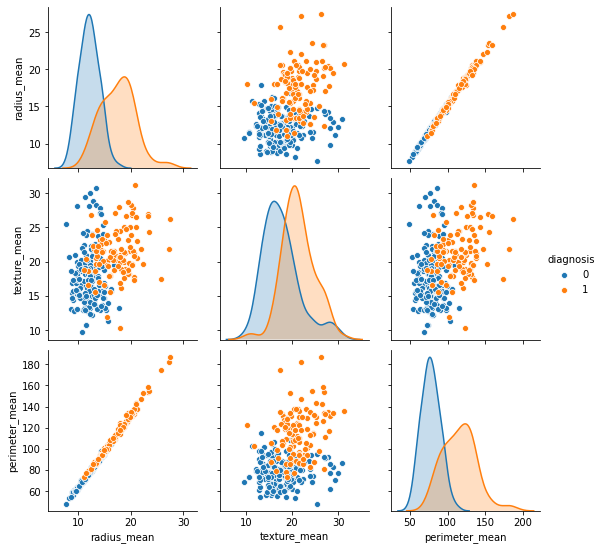

In [67]:
# Create pair plot

sns.pairplot(df.iloc[:, 1:5], hue='diagnosis')

In [68]:
# Correlation study

df.iloc[:, 1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.729067,0.418163,0.740579,0.706959,0.368011,0.576999,0.666474,0.776692,0.304685,-0.048867
radius_mean,0.729067,1.000000,0.372022,0.998041,0.987387,0.146356,0.471479,0.639038,0.821923,0.099997,-0.353722
texture_mean,0.418163,0.372022,1.000000,0.376426,0.375312,-0.015511,0.219548,0.298666,0.321181,0.068956,-0.103760
perimeter_mean,0.740579,0.998041,0.376426,1.000000,0.987446,0.182992,0.520413,0.677130,0.849394,0.132305,-0.307171
area_mean,0.706959,0.987387,0.375312,0.987446,1.000000,0.158791,0.473498,0.658053,0.829000,0.113054,-0.319084
smoothness_mean,0.368011,0.146356,-0.015511,0.182992,0.158791,1.000000,0.687211,0.524638,0.541455,0.542142,0.585435
compactness_mean,0.576999,0.471479,0.219548,0.520413,0.473498,0.687211,1.000000,0.860098,0.815965,0.576842,0.566703
concavity_mean,0.666474,0.639038,0.298666,0.677130,0.658053,0.524638,0.860098,1.000000,0.903274,0.472605,0.340997
concave points_mean,0.776692,0.821923,0.321181,0.849394,0.829000,0.541455,0.815965,0.903274,1.000000,0.408966,0.132950
symmetry_mean,0.304685,0.099997,0.068956,0.132305,0.113054,0.542142,0.576842,0.472605,0.408966,1.000000,0.483459


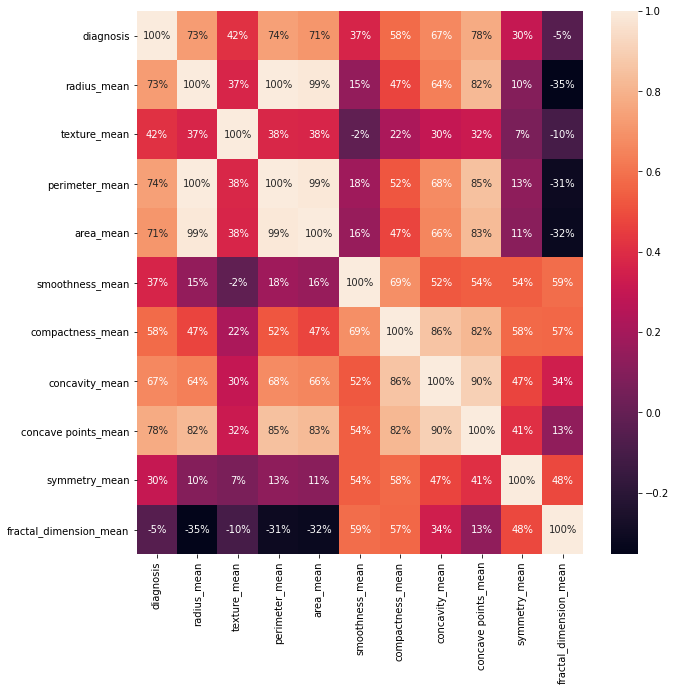

In [74]:
# Visualize the correlations

plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 1:12].corr(), annot=True, fmt='.0%')

### Create model(s)

In [78]:
# Split data set: independant(X) and dependant(Y)
# it also changes the np dataframe to array

X = df.iloc[:, 2:31].values
y = df.iloc[:, 1].values

type(X)

numpy.ndarray

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [83]:
print(len(X_train))
print(len(X_test))

213
71


In [84]:
# Feature scaling: scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [96]:
# Create a function for models

def models(X_train, y_train):
    # Logistic Regression model
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)
    # Print model accuracy
    print('[0]Logistic Regression Training Accuracy', log.score(X_train, y_train))
    print('[1]Decision Tree Training Accuracy', tree.score(X_train, y_train))
    print('[2]Random Forest Training Accuracy', forest.score(X_train, y_train))

    return log, tree, forest

In [99]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy 0.9906103286384976
[1]Decision Tree Training Accuracy 1.0
[2]Random Forest Training Accuracy 0.9953051643192489


In [103]:
# Now need to test model with confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model[0].predict(X_test))
print(cm)
'''
  TP | FP
  FN | TN 
'''

TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

print('Testing Accuracy is ', (TP + TN)*100/(TP+TN+FP+FN), '%')

[[42  0]
 [ 6 23]]
Testing Accuracy is  91.54929577464789 %


In [111]:
for i in range(len(model)):
    print('Model', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    print(cm)
    print('Testing Accuracy is ', (TP + TN)*100/(TP+TN+FP+FN), '%')
    print()

Model 0
[[42  0]
 [ 6 23]]
Testing Accuracy is  91.54929577464789 %

Model 1
[[40  2]
 [ 4 25]]
Testing Accuracy is  91.54929577464789 %

Model 2
[[42  0]
 [ 5 24]]
Testing Accuracy is  92.95774647887323 %



In [116]:
# Another way to get metrics of the model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print(classification_report(y_test, model[i].predict(X_test)))
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print('*****************************************')
    print()

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        42
           1       1.00      0.79      0.88        29

    accuracy                           0.92        71
   macro avg       0.94      0.90      0.91        71
weighted avg       0.93      0.92      0.91        71

0.9154929577464789
*****************************************

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.93      0.86      0.89        29

    accuracy                           0.92        71
   macro avg       0.92      0.91      0.91        71
weighted avg       0.92      0.92      0.91        71

0.9154929577464789
*****************************************

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        42
           1       1.00      0.83      0.91        29

    accuracy                           0.93        71
   m

In [118]:
# Prediction with random forest classifier

pred = model[2].predict(X_test)
print(pred)
print()
print(y_test)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0]

[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1]
